In [2]:
import os
import time
import pickle
import math

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

from catboost.utils import get_confusion_matrix
from catboost import CatBoostClassifier, CatBoostRegressor, Pool, cv
import shap

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'/Users/marcin/Documents/VIMSS/ontology/KG-Hub/KG-Microbe/kg-microbe/notebooks'

In [4]:
shap.initjs()

In [5]:
random_seed = 123

print("start")

df_eco_pos = pd.read_csv('../../link_predict_kgmicrobe_shape_80/taxa_trait__subtract.tsv', sep=',',  encoding='utf-8',index_col=0)
print(df_eco_pos.head())

start
                                                          X0        X1  \
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.036279 -0.033538   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.317539  0.081278   
microtraits.cell_shape_enum:bacillus__NCBITaxon... -0.066746  0.265701   
microtraits.cell_shape_enum:coccobacillus__NCBI... -0.034393  0.095688   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.137629 -0.328779   

                                                          X2        X3  \
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.086043 -0.245980   
microtraits.cell_shape_enum:bacillus__NCBITaxon... -0.240642  0.064289   
microtraits.cell_shape_enum:bacillus__NCBITaxon... -0.427047 -0.266177   
microtraits.cell_shape_enum:coccobacillus__NCBI...  0.052487  0.279343   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.005991 -0.047099   

                                                          X4        X5  \
microtraits.cell_shape_enum:ba

In [6]:
df_eco_neg = pd.read_csv('../../link_predict_kgmicrobe_shape_80/taxa_trait_NEGATIVE__subtract.tsv', sep=',',  encoding='utf-8',index_col=0)
print(df_eco_neg.head())

                                                          X0        X1  \
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.019137  0.021508   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.081960  0.299893   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.031446 -0.004070   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.511435 -0.628734   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.501320 -0.635991   

                                                          X2        X3  \
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.008852 -0.156720   
microtraits.cell_shape_enum:bacillus__NCBITaxon... -0.705422 -0.060192   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.003240 -0.218362   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.089035 -0.026011   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.327460  0.011872   

                                                          X4        X5  \
microtraits.cell_shape_enum:bacillus

In [7]:
df_eco_total_train = df_eco_pos#pd.concat([df_eco_pos, df_eco_neg])

In [8]:
df_eco_total_train.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
microtraits.cell_shape_enum:bacillus__NCBITaxon:54261,0.036279,-0.033538,0.086043,-0.245980,-0.193647,0.013244,0.066222,-0.088953,0.096551,-0.061725,...,-10.571936,0.121468,0.180785,-0.011584,-0.072470,0.158677,0.012545,-0.100771,-0.182450,-0.094698
microtraits.cell_shape_enum:bacillus__NCBITaxon:2714,0.317539,0.081278,-0.240642,0.064289,-0.049873,-0.399619,-0.083252,0.402721,0.171669,-0.060403,...,1.712260,-0.082307,0.627893,0.152435,0.283658,0.458412,0.102320,0.441883,0.301876,0.030156
microtraits.cell_shape_enum:bacillus__NCBITaxon:29466,-0.066746,0.265701,-0.427047,-0.266177,-0.669677,-0.239836,0.324602,-0.100123,0.415561,0.288050,...,0.659472,-0.043056,-0.445973,-0.112094,-0.108631,0.015988,-0.020139,-0.340663,-0.431812,-0.136463
microtraits.cell_shape_enum:coccobacillus__NCBITaxon:266,-0.034393,0.095688,0.052487,0.279343,-0.508257,-0.003421,-0.051788,0.178603,0.247259,0.332819,...,0.492666,0.051159,-0.007466,-0.229401,0.246794,-0.217363,0.209737,0.131283,-0.232361,0.171127
microtraits.cell_shape_enum:bacillus__NCBITaxon:36861,0.137629,-0.328779,0.005991,-0.047099,0.106960,0.489909,0.369924,-0.310287,0.631521,-0.061296,...,-0.084451,0.028598,0.450686,-0.063958,-0.031391,-0.047201,0.280089,0.186927,-0.206858,-0.421345


In [9]:
df_eco_total_train.index

Index(['microtraits.cell_shape_enum:bacillus__NCBITaxon:54261',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:2714',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:29466',
       'microtraits.cell_shape_enum:coccobacillus__NCBITaxon:266',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:36861',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:1484',
       'microtraits.cell_shape_enum:coccus__NCBITaxon:35835',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:55218',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:13773',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:48382',
       ...
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:1294143',
       'microtraits.cell_shape_enum:coccus__NCBITaxon:465541',
       'microtraits.cell_shape_enum:coccus__NCBITaxon:1973484',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:1407071',
       'microtraits.cell_shape_enum:spiral__NCBITaxon:1565991',
       'microtraits.cell_sh

In [10]:
df_eco_total_train

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
microtraits.cell_shape_enum:bacillus__NCBITaxon:54261,0.036279,-0.033538,0.086043,-0.245980,-0.193647,0.013244,0.066222,-0.088953,0.096551,-0.061725,...,-10.571936,0.121468,0.180785,-0.011584,-0.072470,0.158677,0.012545,-0.100771,-0.182450,-0.094698
microtraits.cell_shape_enum:bacillus__NCBITaxon:2714,0.317539,0.081278,-0.240642,0.064289,-0.049873,-0.399619,-0.083252,0.402721,0.171669,-0.060403,...,1.712260,-0.082307,0.627893,0.152435,0.283658,0.458412,0.102320,0.441883,0.301876,0.030156
microtraits.cell_shape_enum:bacillus__NCBITaxon:29466,-0.066746,0.265701,-0.427047,-0.266177,-0.669677,-0.239836,0.324602,-0.100123,0.415561,0.288050,...,0.659472,-0.043056,-0.445973,-0.112094,-0.108631,0.015988,-0.020139,-0.340663,-0.431812,-0.136463
microtraits.cell_shape_enum:coccobacillus__NCBITaxon:266,-0.034393,0.095688,0.052487,0.279343,-0.508257,-0.003421,-0.051788,0.178603,0.247259,0.332819,...,0.492666,0.051159,-0.007466,-0.229401,0.246794,-0.217363,0.209737,0.131283,-0.232361,0.171127
microtraits.cell_shape_enum:bacillus__NCBITaxon:36861,0.137629,-0.328779,0.005991,-0.047099,0.106960,0.489909,0.369924,-0.310287,0.631521,-0.061296,...,-0.084451,0.028598,0.450686,-0.063958,-0.031391,-0.047201,0.280089,0.186927,-0.206858,-0.421345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
microtraits.cell_shape_enum:coccus__NCBITaxon:1921510,0.060325,-0.195444,-0.013567,-0.299037,-0.194152,-0.059702,-0.071089,-0.178273,-0.036324,-0.046097,...,-10.688536,-0.027045,0.269940,0.014519,0.038593,-0.115232,0.019065,-0.017969,-0.221784,0.036082
microtraits.cell_shape_enum:coccus__NCBITaxon:321327,-0.747993,-0.243833,-0.350007,0.296999,-0.591381,-0.383796,-0.474247,0.436890,0.102715,0.063583,...,1.371873,-0.083820,0.373375,-0.178203,0.242044,0.200283,0.127185,-0.038858,-0.048176,0.089012
microtraits.cell_shape_enum:coccus__NCBITaxon:1653479,-0.004674,-0.196038,-0.044980,-0.326443,-0.244997,0.012396,-0.048872,-0.114584,-0.032172,-0.043867,...,-10.738734,-0.037836,0.225755,-0.003795,0.024204,-0.045032,0.003429,0.023876,-0.200695,-0.004724
microtraits.cell_shape_enum:coccus__NCBITaxon:1560339,0.203495,-0.392477,0.091143,-0.164228,-0.210424,-0.095297,-0.067765,-0.297130,0.018555,0.405653,...,1.983209,0.146797,0.769013,-0.119786,0.113709,-0.101253,0.132138,0.168571,-0.396705,-0.157626


In [11]:
type(df_eco_total_train.index.to_numpy())

numpy.ndarray

In [12]:
pos_shape_ar_all = list(np.array(df_eco_total_train.index))#.to_numpy()

In [13]:
type(pos_shape_ar_all[1])

str

In [14]:
#pos_shape_ar = np.char.split(pos_shape_ar_all, sep ='__')#.index.to_numpy().split("__")
pos_shape_ar_all_labels = [i.split('__', 1)[0] for i in pos_shape_ar_all]

In [15]:
#df_eco_total_train_pos_neg = [1] * df_eco_pos.shape[1]
#df_eco_total_train_pos_neg_2 = [0] * df_eco_neg.shape[1]

In [16]:
#df_eco_total_train_pos_neg = df_eco_total_train_pos_neg + df_eco_total_train_pos_neg_2

In [20]:
df_eco_test = pd.read_csv('../../link_predict_kgmicrobe_shape_80/taxa_trait_TEST__subtract.tsv', sep=',', index_col=0, encoding='utf-8')
print(df_eco_test.head())
df_eco_test.shape

                                                          X0        X1  \
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.035488  0.273259   
microtraits.cell_shape_enum:vibrio__NCBITaxon:879   0.311450  0.137938   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.053341  0.262427   
microtraits.cell_shape_enum:coccus__NCBITaxon:4...  0.080406 -0.167514   
microtraits.cell_shape_enum:coccus__NCBITaxon:2280  0.011762 -0.132046   

                                                          X2        X3  \
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.044738  0.041722   
microtraits.cell_shape_enum:vibrio__NCBITaxon:879  -0.251395 -0.402527   
microtraits.cell_shape_enum:bacillus__NCBITaxon... -0.004810 -0.531441   
microtraits.cell_shape_enum:coccus__NCBITaxon:4... -0.001007 -0.290544   
microtraits.cell_shape_enum:coccus__NCBITaxon:2280 -0.027096 -0.280008   

                                                          X4        X5  \
microtraits.cell_shape_enum:bacillus

(3954, 100)

In [21]:
df_eco_test_orig = df_eco_test
df_eco_test = df_eco_test[df_eco_test['pos_neg_label'] == 1]
df_eco_test.shape

KeyError: 'pos_neg_label'

In [22]:
df_eco_test[df_eco_test.columns[0:1]]

,X0
microtraits.cell_shape_enum:bacillus__NCBITaxon:548,0.035488
microtraits.cell_shape_enum:vibrio__NCBITaxon:879,0.311450
microtraits.cell_shape_enum:bacillus__NCBITaxon:930,0.053341
microtraits.cell_shape_enum:coccus__NCBITaxon:47303,0.080406
microtraits.cell_shape_enum:coccus__NCBITaxon:2280,0.011762
...,...
microtraits.cell_shape_enum:bacillus__NCBITaxon:1185767,0.027135
microtraits.cell_shape_enum:filament__NCBITaxon:913108,0.515265
microtraits.cell_shape_enum:filament__NCBITaxon:1499967,0.347439
microtraits.cell_shape_enum:bacillus__NCBITaxon:508869,0.050768


In [23]:
##df_eco_test.index.values.index("\t")

#list(map(lambda x: x.split("__")[0], df_eco_test.index.values))#('.good','').replace('.bad',''),a))
#df.index.set_levels(df.index.get_level_values(1).str[:-5], level=1, inplace=True)

def remove_prefix(x):
    print(x)
    #print(x.index("\t"))
    if("\t" in x):
        x = x.split("\t")[1]    
    return x

df_eco_test.index = df_eco_test.index.map(lambda x: remove_prefix(x))

#df_eco_test[df.columns[0:1]] = df_eco_test[df_eco_test.columns[0:1]].applymap(remove_prefix)
#df_eco_test_index_new = list(map(lambda x: x.split("\t")[0], df_eco_test.index.values))
#df_eco_test.index.get_level_values(0)

microtraits.cell_shape_enum:bacillus__NCBITaxon:548
microtraits.cell_shape_enum:vibrio__NCBITaxon:879
microtraits.cell_shape_enum:bacillus__NCBITaxon:930
microtraits.cell_shape_enum:coccus__NCBITaxon:47303
microtraits.cell_shape_enum:coccus__NCBITaxon:2280
microtraits.cell_shape_enum:disc __NCBITaxon:40752
microtraits.cell_shape_enum:bacillus__NCBITaxon:145261
microtraits.cell_shape_enum:coccus__NCBITaxon:71152
microtraits.cell_shape_enum:bacillus__NCBITaxon:49340
microtraits.cell_shape_enum:coccus__NCBITaxon:67760
microtraits.cell_shape_enum:bacillus__NCBITaxon:2162
microtraits.cell_shape_enum:bacillus__NCBITaxon:29376
microtraits.cell_shape_enum:coccus__NCBITaxon:2199
microtraits.cell_shape_enum:bacillus__NCBITaxon:35554
microtraits.cell_shape_enum:bacillus__NCBITaxon:1565
microtraits.cell_shape_enum:bacillus__NCBITaxon:1509
microtraits.cell_shape_enum:bacillus__NCBITaxon:1749
microtraits.cell_shape_enum:bacillus__NCBITaxon:59505
microtraits.cell_shape_enum:coccobacillus__NCBITaxon:7

microtraits.cell_shape_enum:bacillus__NCBITaxon:1079460
microtraits.cell_shape_enum:bacillus__NCBITaxon:983918
microtraits.cell_shape_enum:coccus__NCBITaxon:553602
microtraits.cell_shape_enum:bacillus__NCBITaxon:749950
microtraits.cell_shape_enum:bacillus__NCBITaxon:766762
microtraits.cell_shape_enum:spiral__NCBITaxon:996863
microtraits.cell_shape_enum:bacillus__NCBITaxon:858313
microtraits.cell_shape_enum:bacillus__NCBITaxon:871587
microtraits.cell_shape_enum:spiral__NCBITaxon:996861
microtraits.cell_shape_enum:bacillus__NCBITaxon:985078
microtraits.cell_shape_enum:bacillus__NCBITaxon:985075
microtraits.cell_shape_enum:vibrio__NCBITaxon:991925
microtraits.cell_shape_enum:bacillus__NCBITaxon:991918
microtraits.cell_shape_enum:bacillus__NCBITaxon:1286635
microtraits.cell_shape_enum:coccus__NCBITaxon:997295
microtraits.cell_shape_enum:bacillus__NCBITaxon:991914
microtraits.cell_shape_enum:coccus__NCBITaxon:996307
microtraits.cell_shape_enum:coccus__NCBITaxon:998087
microtraits.cell_shape

In [24]:
df_eco_test.index

Index(['microtraits.cell_shape_enum:bacillus__NCBITaxon:548',
       'microtraits.cell_shape_enum:vibrio__NCBITaxon:879',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:930',
       'microtraits.cell_shape_enum:coccus__NCBITaxon:47303',
       'microtraits.cell_shape_enum:coccus__NCBITaxon:2280',
       'microtraits.cell_shape_enum:disc __NCBITaxon:40752',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:145261',
       'microtraits.cell_shape_enum:coccus__NCBITaxon:71152',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:49340',
       'microtraits.cell_shape_enum:coccus__NCBITaxon:67760',
       ...
       'microtraits.cell_shape_enum:filament__NCBITaxon:1411148',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:1357999',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:1437881',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:1365651',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:1445511',
       'microtraits.cell_shape_enum:ba

In [25]:
df_eco_test_labels = df_eco_test.index
df_eco_test_shapes = [i.split('__', 1)[0] for i in df_eco_test_labels]
df_eco_test_taxa = [i.split('__', 1)[1] for i in df_eco_test_labels]
df_eco_total_train_labels = list(df_eco_total_train.index.values)
df_eco_total_train_shapes = [i.split('__', 1)[0] for i in df_eco_total_train_labels]
df_eco_total_train_taxa = [i.split('__', 1)[1] for i in df_eco_total_train_labels]

df_eco_test_orig = df_eco_test

df_eco_test_shapes

['microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:vibrio',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:disc ',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccobacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_e

In [26]:
df_eco_test = df_eco_test_orig

In [29]:
X_df_eco_test = df_eco_test#df_eco_test.drop(['pos_neg_label'], axis=1)
y_df_eco_test = df_eco_test_shapes

In [30]:
print(len(y_df_eco_test))
X_df_eco_test.shape

3954


(3954, 100)

In [31]:
type(y_df_eco_test)

list

In [68]:
#badindex = y_df_eco_test.index("microtraits.cell_shape_enum:triangular")
while("microtraits.cell_shape_enum:branced" in y_df_eco_test):    
    badindex = y_df_eco_test.index("microtraits.cell_shape_enum:branced")
    print(badindex)
    rem = y_df_eco_test.remove(y_df_eco_test[badindex])
    X_df_eco_test = X_df_eco_test.drop([X_df_eco_test.index[badindex]])

1084


In [70]:
y_df_eco_test.index("microtraits.cell_shape_enum:branced")

ValueError: 'microtraits.cell_shape_enum:branced' is not in list

In [71]:
print(len(y_df_eco_test))
X_df_eco_test.shape

3953


(3953, 100)

In [81]:
#spindle
while("microtraits.cell_shape_enum:triangular" in y_df_eco_test):    
    badindex4 = y_df_eco_test.index("microtraits.cell_shape_enum:triangular")
    print(badindex4)
    rem = y_df_eco_test.remove(y_df_eco_test[badindex4])
    X_df_eco_test = X_df_eco_test.drop([X_df_eco_test.index[badindex4]])

1282


In [82]:
y_df_eco_test.index("microtraits.cell_shape_enum:triangular")

ValueError: 'microtraits.cell_shape_enum:triangular' is not in list

In [83]:
print(len(y_df_eco_test))
X_df_eco_test.shape

3952


(3952, 100)

In [93]:
#"microtraits.cell_shape_enum:ring"
while("microtraits.cell_shape_enum:ring" in y_df_eco_test):    
    badindex3 = y_df_eco_test.index("microtraits.cell_shape_enum:ring")
    print(badindex3)
    rem = y_df_eco_test.remove(y_df_eco_test[badindex3])
    X_df_eco_test = X_df_eco_test.drop([X_df_eco_test.index[badindex3]])

1765


In [94]:
y_df_eco_test.index("microtraits.cell_shape_enum:ring")

ValueError: 'microtraits.cell_shape_enum:ring' is not in list

In [95]:
print(len(y_df_eco_test))
X_df_eco_test.shape

3951


(3951, 100)

In [106]:
#spirochete
while("microtraits.cell_shape_enum:tailed" in y_df_eco_test):    
    badindex5 = y_df_eco_test.index("microtraits.cell_shape_enum:tailed")
    print(badindex5)
    rem = y_df_eco_test.remove(y_df_eco_test[badindex5])
    X_df_eco_test = X_df_eco_test.drop([X_df_eco_test.index[badindex5]])

2033


In [107]:
y_df_eco_test.index("microtraits.cell_shape_enum:tailed")

ValueError: 'microtraits.cell_shape_enum:tailed' is not in list

In [108]:
print(len(y_df_eco_test))
X_df_eco_test.shape

3950


(3950, 100)

In [118]:
#badindex2 = y_df_eco_test.index("microtraits.cell_shape_enum:tailed")
#print(badindex2)
#rem2 = y_df_eco_test.pop(badindex2)
#X_df_eco_test = X_df_eco_test.drop([X_df_eco_test.index[badindex2]])

while("microtraits.cell_shape_enum:spindle" in y_df_eco_test):    
    badindex2 = y_df_eco_test.index("microtraits.cell_shape_enum:spindle")
    print(badindex2)
    rem = y_df_eco_test.remove(y_df_eco_test[badindex2])
    X_df_eco_test = X_df_eco_test.drop([X_df_eco_test.index[badindex2]])

2559


In [119]:
print(len(y_df_eco_test))
X_df_eco_test.shape

3949


(3949, 100)

In [120]:
y_df_eco_test.index("microtraits.cell_shape_enum:spindle")

ValueError: 'microtraits.cell_shape_enum:spindle' is not in list

In [130]:
#spirochete
while("microtraits.cell_shape_enum:spirochete" in y_df_eco_test):    
    badindex2 = y_df_eco_test.index("microtraits.cell_shape_enum:spirochete")
    print(badindex2)
    rem = y_df_eco_test.remove(y_df_eco_test[badindex2])
    X_df_eco_test = X_df_eco_test.drop([X_df_eco_test.index[badindex2]])

2589


In [131]:
y_df_eco_test.index("microtraits.cell_shape_enum:spirochete")

ValueError: 'microtraits.cell_shape_enum:spirochete' is not in list

In [132]:
print(len(y_df_eco_test))
X_df_eco_test.shape

3948


(3948, 100)

In [67]:
print(len(df_eco_total_train_shapes))
print(len(df_eco_test_shapes))

df_eco_total_train_shapes_comp = set(sorted(df_eco_total_train_shapes))
df_eco_test_shapes_comp = set(sorted(df_eco_test_shapes))

df_eco_total_train_taxa_comp = set(sorted(df_eco_total_train_taxa))
df_eco_test_taxa_comp = set(sorted(df_eco_test_taxa))

print(len(df_eco_total_train_shapes_comp))
print(len(df_eco_test_shapes_comp))

print(set(df_eco_total_train_shapes_comp).intersection(df_eco_test_shapes_comp))

print(len(df_eco_total_train_taxa_comp))
print(len(df_eco_test_taxa_comp))

print(len(set(df_eco_total_train_taxa_comp).intersection(df_eco_test_taxa_comp)))


15073
3954
16
19
{'microtraits.cell_shape_enum:coccobacillus', 'microtraits.cell_shape_enum:square', 'microtraits.cell_shape_enum:spindle', 'microtraits.cell_shape_enum:spiral', 'microtraits.cell_shape_enum:branced', 'microtraits.cell_shape_enum:bacillus', 'microtraits.cell_shape_enum:pleomorphic', 'microtraits.cell_shape_enum:irregular', 'microtraits.cell_shape_enum:fusiform', 'microtraits.cell_shape_enum:coccus', 'microtraits.cell_shape_enum:disc ', 'microtraits.cell_shape_enum:tailed', 'microtraits.cell_shape_enum:vibrio', 'microtraits.cell_shape_enum:flask', 'microtraits.cell_shape_enum:filament', 'microtraits.cell_shape_enum:star'}
15073
3934
703


In [33]:
df_eco_test_shapes_comp

{'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:branced',
 'microtraits.cell_shape_enum:coccobacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:disc ',
 'microtraits.cell_shape_enum:filament',
 'microtraits.cell_shape_enum:flask',
 'microtraits.cell_shape_enum:fusiform',
 'microtraits.cell_shape_enum:irregular',
 'microtraits.cell_shape_enum:pleomorphic',
 'microtraits.cell_shape_enum:ring',
 'microtraits.cell_shape_enum:spindle',
 'microtraits.cell_shape_enum:spiral',
 'microtraits.cell_shape_enum:spirochete',
 'microtraits.cell_shape_enum:square',
 'microtraits.cell_shape_enum:star',
 'microtraits.cell_shape_enum:tailed',
 'microtraits.cell_shape_enum:triangular',
 'microtraits.cell_shape_enum:vibrio'}

In [34]:
df_eco_total_train.shape

(15073, 100)

In [35]:
df_eco_total_train.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
count,15073.000000,15073.000000,15073.000000,15073.000000,15073.000000,15073.000000,15073.000000,15073.000000,15073.000000,15073.000000,...,15073.000000,15073.000000,15073.000000,15073.000000,15073.000000,15073.000000,15073.000000,15073.000000,15073.000000,15073.000000
mean,0.073394,-0.083224,0.042935,-0.175759,-0.213116,0.048752,0.035429,-0.113404,0.046405,-0.041665,...,-5.269639,0.089191,0.195286,-0.005976,-0.025965,0.047099,0.029170,-0.052066,-0.231686,-0.089659
std,0.243384,0.210756,0.229762,0.246142,0.226998,0.218493,0.222425,0.216141,0.209667,0.226212,...,5.887451,0.215182,0.212321,0.213943,0.233301,0.281962,0.211565,0.212910,0.207990,0.233528
min,-1.689152,-1.381406,-2.312668,-1.894953,-2.574993,-2.375057,-2.817586,-1.643935,-1.380990,-1.736569,...,-12.510977,-2.303585,-1.404961,-1.707045,-1.542941,-2.364042,-1.997873,-1.864636,-2.060968,-1.640035
25%,-0.016465,-0.177810,-0.051526,-0.271963,-0.265471,-0.037607,-0.065734,-0.161992,-0.041576,-0.104218,...,-10.621742,-0.004357,0.166914,-0.050614,-0.079221,-0.080704,-0.036924,-0.098382,-0.268538,-0.138108
50%,0.029789,-0.042859,0.027069,-0.209549,-0.196168,0.026216,0.028826,-0.105519,0.030775,-0.059074,...,-10.541228,0.076887,0.213715,0.012012,-0.015911,0.137934,0.007972,-0.045495,-0.214596,-0.073201
75%,0.144049,0.019054,0.093133,-0.143267,-0.142809,0.087891,0.091990,-0.052866,0.094921,-0.011667,...,0.965095,0.142453,0.257307,0.062981,0.056705,0.205433,0.061379,0.011863,-0.167860,0.020923
max,2.063744,2.009015,1.652427,1.651583,1.290379,1.981904,2.392823,1.478156,1.474413,1.854056,...,12.218370,1.948125,2.516928,1.731867,1.427618,2.008021,1.756761,2.580797,1.773917,1.596564


In [36]:
ser = pd.Series(pos_shape_ar_all_labels)
ser.index = df_eco_total_train.index
y_counts = ser.value_counts()
#require minimum category members = 3
keep_y = y_counts[y_counts > 2].index
df_eco_total_train_trim = df_eco_total_train[ser.isin(keep_y)]
print(df_eco_total_train_trim.shape)

print(type(pos_shape_ar_all_labels))
print(len(list(ser.isin(keep_y))))
#print(len(list(ser.isin(keep_y)) == True))
print(type(ser.isin(keep_y)))

pos_shape_ar_all_labels_trim = ser[ser.isin(keep_y)]
print(len(pos_shape_ar_all_labels_trim))

(15069, 100)
<class 'list'>
15073
<class 'pandas.core.series.Series'>
15069


In [37]:
y = pos_shape_ar_all_labels_trim
print(y)


X = df_eco_total_train_trim

microtraits.cell_shape_enum:bacillus__NCBITaxon:54261            microtraits.cell_shape_enum:bacillus
microtraits.cell_shape_enum:bacillus__NCBITaxon:2714             microtraits.cell_shape_enum:bacillus
microtraits.cell_shape_enum:bacillus__NCBITaxon:29466            microtraits.cell_shape_enum:bacillus
microtraits.cell_shape_enum:coccobacillus__NCBITaxon:266    microtraits.cell_shape_enum:coccobacillus
microtraits.cell_shape_enum:bacillus__NCBITaxon:36861            microtraits.cell_shape_enum:bacillus
                                                                              ...                    
microtraits.cell_shape_enum:coccus__NCBITaxon:1921510              microtraits.cell_shape_enum:coccus
microtraits.cell_shape_enum:coccus__NCBITaxon:321327               microtraits.cell_shape_enum:coccus
microtraits.cell_shape_enum:coccus__NCBITaxon:1653479              microtraits.cell_shape_enum:coccus
microtraits.cell_shape_enum:coccus__NCBITaxon:1560339              microtraits.cel

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=random_seed) #, random_state=9# The seed was 'chosen' so test and training contain all labels: rn=3,4,8,9
print("train label deficit:",len(set(y)-set(y_train)),"test label deficit:",len(set(y)-set(y_test)))

print("shapes "+str(X_train.shape)+"\t"+str(X_test.shape)+"\t"+str(y_train.shape)+"\t"+str(y_test.shape))

all_80_dataset = Pool(X, y)
train_dataset = Pool(X_train, y_train)
test_dataset = Pool(X_test, y_test)

input_data_dump = [X, y, X_train, X_test, y_train, y_test]
pickle.dump(input_data_dump,open("input_data_dump", "wb" ) )

train label deficit: 0 test label deficit: 0
shapes (11301, 100)	(3768, 100)	(11301,)	(3768,)


In [39]:
X_test.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
microtraits.cell_shape_enum:bacillus__NCBITaxon:301953,0.262826,0.122900,0.083055,0.176779,0.140994,0.144094,0.247532,-0.009743,0.064837,0.096961,...,1.071887,0.020335,-0.283498,0.071229,-0.125837,0.256291,0.229295,0.107202,0.334815,-0.091661
microtraits.cell_shape_enum:coccus__NCBITaxon:1515090,-0.002963,-0.162308,-0.059887,-0.288835,-0.248595,-0.059367,-0.075551,-0.168667,-0.003174,-0.005636,...,-10.706747,-0.017688,0.196602,-0.072241,-0.005040,-0.070338,-0.004655,0.004561,-0.153455,0.065918
microtraits.cell_shape_enum:bacillus__NCBITaxon:251747,0.284107,-0.145129,0.203685,0.024374,-0.200470,0.382044,0.012838,0.018299,0.276368,0.016160,...,1.676171,0.581288,0.482635,-0.033808,-0.110056,0.158987,0.342826,0.006830,-0.144114,-0.305857
microtraits.cell_shape_enum:coccus__NCBITaxon:439612,0.319850,0.171291,0.043686,0.489996,-0.321798,0.331915,0.223431,-0.508952,-0.228971,-0.070135,...,0.498429,0.542109,0.061826,-0.438047,-0.400669,-0.238430,0.143689,0.024050,-0.444146,0.010073
microtraits.cell_shape_enum:bacillus__NCBITaxon:97399,0.216653,-0.253898,0.495478,-0.376132,-0.065692,0.270428,0.297353,-0.371523,0.244395,-0.155127,...,1.261286,0.118135,-0.242624,0.288301,-0.333187,0.238875,0.252566,-0.269465,-0.468921,-0.194811


In [40]:
X_train.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
microtraits.cell_shape_enum:bacillus__NCBITaxon:132919,0.519616,-0.288208,0.300709,0.093718,-0.615539,0.191417,0.093251,-0.296808,0.470210,0.251085,...,0.553841,0.375622,-0.009223,-0.064167,-0.139561,-0.079067,0.230083,-0.055853,-0.306198,-0.221365
microtraits.cell_shape_enum:bacillus__NCBITaxon:1679494,0.210408,0.096340,-0.575956,-0.193944,-0.088242,-0.440427,0.656336,0.202587,-0.001370,-0.117367,...,1.596194,0.169242,0.334754,-0.062157,0.304119,0.718668,-0.519971,0.122006,-0.009367,0.046629
microtraits.cell_shape_enum:bacillus__NCBITaxon:547461,-0.052532,-0.257106,-0.088350,0.736882,-0.411494,0.269931,-0.011279,-0.421657,0.344959,0.246034,...,2.091609,0.971237,-0.041807,-0.961415,-0.168498,0.235668,0.002372,-0.297865,-1.347582,-0.030938
microtraits.cell_shape_enum:coccus__NCBITaxon:316284,0.041780,-0.057553,-0.034134,-0.158414,-0.308775,0.132043,-0.072596,-0.143208,-0.232899,-0.289782,...,1.201449,-0.426716,0.223021,-0.547589,-0.079998,-0.441878,0.023633,0.021791,-0.284648,-0.274871
microtraits.cell_shape_enum:bacillus__NCBITaxon:45610,0.030760,0.006328,0.009861,-0.180935,-0.171744,0.052858,0.017251,-0.137893,0.060543,-0.029332,...,-10.570061,0.128076,0.215891,0.015317,-0.044015,0.184481,0.018772,-0.028597,-0.273193,-0.094630


In [42]:
class_counts_all = y.value_counts()
max_count_all = max(class_counts_all)
class_weights_all = {i:max_count_all/x for i,x in class_counts_all.iteritems()}
class_weights_all

{'microtraits.cell_shape_enum:bacillus': 1.0,
 'microtraits.cell_shape_enum:coccus': 1.9706612502821033,
 'microtraits.cell_shape_enum:spiral': 13.926634768740032,
 'microtraits.cell_shape_enum:coccobacillus': 21.401960784313726,
 'microtraits.cell_shape_enum:vibrio': 21.507389162561577,
 'microtraits.cell_shape_enum:filament': 22.918635170603675,
 'microtraits.cell_shape_enum:pleomorphic': 198.45454545454547,
 'microtraits.cell_shape_enum:disc ': 671.6923076923077,
 'microtraits.cell_shape_enum:fusiform': 727.6666666666666,
 'microtraits.cell_shape_enum:flask': 2183.0,
 'microtraits.cell_shape_enum:square': 2183.0,
 'microtraits.cell_shape_enum:irregular': 2183.0,
 'microtraits.cell_shape_enum:star': 2910.6666666666665}

In [43]:
class_counts = y_train.value_counts()
max_count = max(class_counts)
class_weights = {i:max_count/x for i,x in class_counts.iteritems()}
class_weights

{'microtraits.cell_shape_enum:bacillus': 1.0,
 'microtraits.cell_shape_enum:coccus': 1.970809509479386,
 'microtraits.cell_shape_enum:spiral': 13.934042553191489,
 'microtraits.cell_shape_enum:coccobacillus': 21.401960784313726,
 'microtraits.cell_shape_enum:vibrio': 21.542763157894736,
 'microtraits.cell_shape_enum:filament': 22.8986013986014,
 'microtraits.cell_shape_enum:pleomorphic': 198.45454545454547,
 'microtraits.cell_shape_enum:disc ': 654.9,
 'microtraits.cell_shape_enum:fusiform': 727.6666666666666,
 'microtraits.cell_shape_enum:flask': 2183.0,
 'microtraits.cell_shape_enum:square': 2183.0,
 'microtraits.cell_shape_enum:irregular': 2183.0,
 'microtraits.cell_shape_enum:star': 3274.5}

In [44]:
class_counts_test = y_test.value_counts()
max_count_test = max(class_counts_test)
class_weights_test = {i:max_count_test/x for i,x in class_counts_test.iteritems()}
class_weights_test

{'microtraits.cell_shape_enum:bacillus': 1.0,
 'microtraits.cell_shape_enum:coccus': 1.970216606498195,
 'microtraits.cell_shape_enum:spiral': 13.904458598726114,
 'microtraits.cell_shape_enum:vibrio': 21.401960784313726,
 'microtraits.cell_shape_enum:coccobacillus': 21.401960784313726,
 'microtraits.cell_shape_enum:filament': 22.978947368421053,
 'microtraits.cell_shape_enum:pleomorphic': 198.45454545454547,
 'microtraits.cell_shape_enum:disc ': 727.6666666666666,
 'microtraits.cell_shape_enum:fusiform': 727.6666666666666,
 'microtraits.cell_shape_enum:flask': 2183.0,
 'microtraits.cell_shape_enum:star': 2183.0,
 'microtraits.cell_shape_enum:square': 2183.0,
 'microtraits.cell_shape_enum:irregular': 2183.0}

In [45]:
type(y_test)
y_df_eco_test_ser = pd.Series(y_df_eco_test)

In [46]:

class_counts_test20 = y_df_eco_test_ser.value_counts()
max_count_test20 = max(class_counts_test20)
class_weights_test20 = {i:max_count_test20/x for i,x in class_counts_test20.iteritems()}
class_weights_test20

{'microtraits.cell_shape_enum:bacillus': 1.0,
 'microtraits.cell_shape_enum:coccus': 2.0863757791629562,
 'microtraits.cell_shape_enum:spiral': 14.92356687898089,
 'microtraits.cell_shape_enum:coccobacillus': 22.74757281553398,
 'microtraits.cell_shape_enum:vibrio': 22.970588235294116,
 'microtraits.cell_shape_enum:filament': 24.40625,
 'microtraits.cell_shape_enum:pleomorphic': 213.0,
 'microtraits.cell_shape_enum:disc ': 585.75,
 'microtraits.cell_shape_enum:fusiform': 781.0,
 'microtraits.cell_shape_enum:square': 1171.5,
 'microtraits.cell_shape_enum:irregular': 1171.5,
 'microtraits.cell_shape_enum:spindle': 2343.0,
 'microtraits.cell_shape_enum:triangular': 2343.0,
 'microtraits.cell_shape_enum:spirochete': 2343.0,
 'microtraits.cell_shape_enum:ring': 2343.0,
 'microtraits.cell_shape_enum:branced': 2343.0,
 'microtraits.cell_shape_enum:star': 2343.0,
 'microtraits.cell_shape_enum:tailed': 2343.0,
 'microtraits.cell_shape_enum:flask': 2343.0}

In [47]:
pd.concat([pd.Series(class_weights_all), pd.Series(class_weights), pd.Series(class_weights_test), pd.Series(class_weights_test20)], axis=1)

,0,1,2,3
microtraits.cell_shape_enum:bacillus,1.000000,1.000000,1.000000,1.000000
microtraits.cell_shape_enum:coccus,1.970661,1.970810,1.970217,2.086376
microtraits.cell_shape_enum:spiral,13.926635,13.934043,13.904459,14.923567
microtraits.cell_shape_enum:coccobacillus,21.401961,21.401961,21.401961,22.747573
microtraits.cell_shape_enum:vibrio,21.507389,21.542763,21.401961,22.970588
microtraits.cell_shape_enum:filament,22.918635,22.898601,22.978947,24.406250
microtraits.cell_shape_enum:pleomorphic,198.454545,198.454545,198.454545,213.000000
microtraits.cell_shape_enum:disc,671.692308,654.900000,727.666667,585.750000
microtraits.cell_shape_enum:fusiform,727.666667,727.666667,727.666667,781.000000
microtraits.cell_shape_enum:flask,2183.000000,2183.000000,2183.000000,2343.000000


In [117]:

#cb_model = CatBoostClassifier(
#    iterations=200,
#    verbose=5,
#    learning_rate=0.02,
#    depth=5,
#    eval_metric='MCC',
#    random_seed=random_seed,
#    bagging_temperature=0.2,
#    od_type='Iter',
#    od_wait=100,
#    class_weights=class_weights)

#grid = {'learning_rate': [0.06, 0.1,0.14],
#        'depth': [4, 5, 6],
#        'l2_leaf_reg': [0.5, 1, 5]}

In [48]:
cb_model = CatBoostClassifier(
                             loss_function='MultiClass',                              
                             #loss_function='MAE',
                             iterations = 500,
                             verbose = 5,
                             learning_rate = 0.1,
                             depth = 3,
                             l2_leaf_reg = 0.5,
                             border_count=100,    
                             random_strength = 1,
                             bagging_temperature = 0.2,
                             eval_metric='Kappa',
                             #eval_metric='Accuracy',
                             #eval_metric = 'MCC',
                             random_seed = random_seed,
                             od_type = 'Iter',
                             od_wait = 50,
                             class_weights=class_weights
)

#last search
#de %s 6 it 250 le 0.1 lr 0.1 bc 100 rs 3 bt 0.1
params = {'depth':[4,5,6],
          #'iterations':[50,100,250],
          'learning_rate':[0.001, 0.1, 1], 
          'l2_leaf_reg':[0.0001, 0.01, 0.1],#[0.1,1,2],
          'border_count':[10,100,200],
          'random_strength':[0.1, 3,10],#[0.1, 1, 3],
          'bagging_temperature':[0.001, 0.01, 0.1]#[0.1, 1, 3],
         }


In [49]:
modelstart = time.time()

print(f"Starting search at {modelstart}")

grid_search_result = cb_model.grid_search(params, all_80_dataset)#train_dataset)
#grid_search_result = cb_model.randomized_search(grid, train_dataset)

de = grid_search_result['params']['depth']
it = 250#grid_search_result['params']['iterations']
le = 0.1#grid_search_result['params']['learning_rate']
lr = grid_search_result['params']['l2_leaf_reg']
bc = 100#grid_search_result['params']['border_count']
rs = grid_search_result['params']['random_strength']
bt = grid_search_result['params']['bagging_temperature']

print(f"Trained grid search in {time.time() - modelstart}s")
print("de %s", str(de), "it", str(it), "le",str(le),"lr",str(lr),"bc",str(bc),"rs",str(rs),"bt",str(bt))

Starting search at 1618984259.060512
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9384579929
bestIteration = 302

0:	loss: 0.9384580	best: 0.9384580 (0)	total: 7.11s	remaining: 1h 26m 15s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9504332536
bestIteration = 120

1:	loss: 0.9504333	best: 0.9504333 (1)	total: 10.4s	remaining: 1h 2m 44s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5766645387
bestIteration = 43

2:	loss: 0.5766645	best: 0.9504333 (1)	total: 12.3s	remaining: 49m 25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9384579134
bestIteration = 302

3:	loss: 0.9384579	best: 0.9504333 (1)	total: 19.6s	remaining: 59m 14s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9511701821
bestIteration = 118

4:	loss: 0.9511702	best: 0.9511702 (4)	total: 23.1s	remaining: 55m 44s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7016371071
bestIteration = 94

5:	lo

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9412198249
bestIteration = 238

48:	loss: 0.9412198	best: 0.9723990 (15)	total: 3m 46s	remaining: 52m 24s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7935937903
bestIteration = 111

49:	loss: 0.7935938	best: 0.9723990 (15)	total: 3m 50s	remaining: 52m 14s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6247670996
bestIteration = 3

50:	loss: 0.6247671	best: 0.9723990 (15)	total: 3m 52s	remaining: 51m 27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9411642652
bestIteration = 236

51:	loss: 0.9411643	best: 0.9723990 (15)	total: 4m	remaining: 52m 5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7942779135
bestIteration = 102

52:	loss: 0.7942779	best: 0.9723990 (15)	total: 4m 4s	remaining: 51m 56s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6431652748
bestIteration = 19

53:	loss: 0.6431653	best: 0.9723990 (15

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7028520309
bestIteration = 14

95:	loss: 0.7028520	best: 0.9723990 (15)	total: 9m 45s	remaining: 1h 4m 21s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9723989591
bestIteration = 246

96:	loss: 0.9723990	best: 0.9723990 (15)	total: 9m 52s	remaining: 1h 4m 20s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9189059229
bestIteration = 223

97:	loss: 0.9189059	best: 0.9723990 (15)	total: 9m 58s	remaining: 1h 4m 14s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6886458147
bestIteration = 29

98:	loss: 0.6886458	best: 0.9723990 (15)	total: 10m	remaining: 1h 3m 39s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9688545139
bestIteration = 202

99:	loss: 0.9688545	best: 0.9723990 (15)	total: 10m 5s	remaining: 1h 3m 31s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9137207428
bestIteration = 105

100:	loss: 0.9137207	best

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9247585687
bestIteration = 38

142:	loss: 0.9247586	best: 0.9723990 (15)	total: 13m 43s	remaining: 56m 13s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6625920662
bestIteration = 34

143:	loss: 0.6625921	best: 0.9723990 (15)	total: 13m 48s	remaining: 56m 5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9364710076
bestIteration = 152

144:	loss: 0.9364710	best: 0.9723990 (15)	total: 13m 59s	remaining: 56m 21s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7902498294
bestIteration = 60

145:	loss: 0.7902498	best: 0.9723990 (15)	total: 14m 5s	remaining: 56m 17s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7401573448
bestIteration = 14

146:	loss: 0.7401573	best: 0.9723990 (15)	total: 14m 9s	remaining: 56m 3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9364161684
bestIteration = 152

147:	loss: 0.9364162	best: 0

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9504305751
bestIteration = 173

189:	loss: 0.9504306	best: 0.9723990 (15)	total: 17m 40s	remaining: 50m 9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9258320147
bestIteration = 28

190:	loss: 0.9258320	best: 0.9723990 (15)	total: 17m 42s	remaining: 49m 53s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6956562796
bestIteration = 3

191:	loss: 0.6956563	best: 0.9723990 (15)	total: 17m 43s	remaining: 49m 35s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9504304262
bestIteration = 173

192:	loss: 0.9504304	best: 0.9723990 (15)	total: 17m 49s	remaining: 49m 31s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9258320147
bestIteration = 28

193:	loss: 0.9258320	best: 0.9723990 (15)	total: 17m 51s	remaining: 49m 15s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6928047528
bestIteration = 3

194:	loss: 0.6928048	best: 

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6974288554
bestIteration = 38

236:	loss: 0.6974289	best: 0.9723990 (15)	total: 22m 2s	remaining: 45m 44s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9443589137
bestIteration = 265

237:	loss: 0.9443589	best: 0.9723990 (15)	total: 22m 19s	remaining: 46m 2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8657910514
bestIteration = 20

238:	loss: 0.8657911	best: 0.9723990 (15)	total: 22m 22s	remaining: 45m 53s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7703351678
bestIteration = 18

239:	loss: 0.7703352	best: 0.9723990 (15)	total: 22m 26s	remaining: 45m 44s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9443025274
bestIteration = 264

240:	loss: 0.9443025	best: 0.9723990 (15)	total: 22m 43s	remaining: 46m 1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8975100568
bestIteration = 85

241:	loss: 0.8975101	best: 

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9041204365
bestIteration = 52

283:	loss: 0.9041204	best: 0.9833577 (250)	total: 25m 18s	remaining: 39m 38s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6583095654
bestIteration = 12

284:	loss: 0.6583096	best: 0.9833577 (250)	total: 25m 20s	remaining: 39m 29s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9085201818
bestIteration = 33

285:	loss: 0.9085202	best: 0.9833577 (250)	total: 25m 24s	remaining: 39m 21s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9046673819
bestIteration = 54

286:	loss: 0.9046674	best: 0.9833577 (250)	total: 25m 28s	remaining: 39m 13s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7056356131
bestIteration = 19

287:	loss: 0.7056356	best: 0.9833577 (250)	total: 25m 31s	remaining: 39m 4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9123038131
bestIteration = 34

288:	loss: 0.9123038	b

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9353817119
bestIteration = 181

330:	loss: 0.9353817	best: 0.9833577 (250)	total: 31m 22s	remaining: 37m 50s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9685861589
bestIteration = 47

331:	loss: 0.9685862	best: 0.9833577 (250)	total: 31m 25s	remaining: 37m 41s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5810487011
bestIteration = 48

332:	loss: 0.5810487	best: 0.9833577 (250)	total: 31m 27s	remaining: 37m 31s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8451914948
bestIteration = 35

333:	loss: 0.8451915	best: 0.9833577 (250)	total: 31m 29s	remaining: 37m 21s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.909503229
bestIteration = 13

334:	loss: 0.9095032	best: 0.9833577 (250)	total: 31m 31s	remaining: 37m 11s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6769108584
bestIteration = 107

335:	loss: 0.6769109

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7853866558
bestIteration = 15

377:	loss: 0.7853867	best: 0.9833577 (250)	total: 34m 20s	remaining: 31m 58s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9634815838
bestIteration = 287

378:	loss: 0.9634816	best: 0.9833577 (250)	total: 34m 46s	remaining: 32m 11s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7883660032
bestIteration = 136

379:	loss: 0.7883660	best: 0.9833577 (250)	total: 35m	remaining: 32m 14s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6733555152
bestIteration = 26

380:	loss: 0.6733555	best: 0.9833577 (250)	total: 35m 8s	remaining: 32m 10s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9633121918
bestIteration = 256

381:	loss: 0.9633122	best: 0.9833577 (250)	total: 35m 31s	remaining: 32m 21s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7507881867
bestIteration = 14

382:	loss: 0.7507882	be

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9178656142
bestIteration = 202

424:	loss: 0.9178656	best: 0.9833577 (250)	total: 40m 54s	remaining: 29m 19s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6764735624
bestIteration = 19

425:	loss: 0.6764736	best: 0.9833577 (250)	total: 40m 56s	remaining: 29m 11s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8439628082
bestIteration = 38

426:	loss: 0.8439628	best: 0.9833577 (250)	total: 40m 59s	remaining: 29m 3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.918369621
bestIteration = 139

427:	loss: 0.9183696	best: 0.9833577 (250)	total: 41m 3s	remaining: 28m 56s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6384121538
bestIteration = 13

428:	loss: 0.6384122	best: 0.9833577 (250)	total: 41m 5s	remaining: 28m 48s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8438559958
bestIteration = 38

429:	loss: 0.8438560	be

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8475596201
bestIteration = 57

471:	loss: 0.8475596	best: 0.9833577 (250)	total: 45m 30s	remaining: 24m 49s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.915737557
bestIteration = 120

472:	loss: 0.9157376	best: 0.9833577 (250)	total: 45m 43s	remaining: 24m 48s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5845916286
bestIteration = 46

473:	loss: 0.5845916	best: 0.9833577 (250)	total: 45m 53s	remaining: 24m 44s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8485664896
bestIteration = 52

474:	loss: 0.8485665	best: 0.9833577 (250)	total: 46m 1s	remaining: 24m 39s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9120825806
bestIteration = 70

475:	loss: 0.9120826	best: 0.9833577 (250)	total: 46m 11s	remaining: 24m 36s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5428864392
bestIteration = 4

476:	loss: 0.5428864	be

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6028729556
bestIteration = 110

518:	loss: 0.6028730	best: 0.9833577 (250)	total: 50m 51s	remaining: 20m 36s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9502301148
bestIteration = 136

519:	loss: 0.9502301	best: 0.9833577 (250)	total: 51m	remaining: 20m 32s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9133101382
bestIteration = 93

520:	loss: 0.9133101	best: 0.9833577 (250)	total: 51m 7s	remaining: 20m 26s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.536858122
bestIteration = 40

521:	loss: 0.5368581	best: 0.9833577 (250)	total: 51m 12s	remaining: 20m 20s

bestTest = 0.9430063859
bestIteration = 462

522:	loss: 0.9430064	best: 0.9833577 (250)	total: 51m 37s	remaining: 20m 22s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9278417118
bestIteration = 40

523:	loss: 0.9278417	best: 0.9833577 (250)	total: 51m 42s	remaining: 20m 16s
S

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9156480467
bestIteration = 214

565:	loss: 0.9156480	best: 0.9833577 (250)	total: 1h 3m 37s	remaining: 18m 23s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.555227523
bestIteration = 1

566:	loss: 0.5552275	best: 0.9833577 (250)	total: 1h 3m 44s	remaining: 18m 16s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9382969685
bestIteration = 189

567:	loss: 0.9382970	best: 0.9833577 (250)	total: 1h 3m 52s	remaining: 18m 10s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8443937661
bestIteration = 38

568:	loss: 0.8443938	best: 0.9833577 (250)	total: 1h 3m 55s	remaining: 18m 2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5281423195
bestIteration = 137

569:	loss: 0.5281423	best: 0.9833577 (250)	total: 1h 4m 2s	remaining: 17m 55s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9382969685
bestIteration = 189

570:	loss: 

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9078000874
bestIteration = 32

612:	loss: 0.9078001	best: 0.9833577 (250)	total: 1h 9m 11s	remaining: 13m 8s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9126659867
bestIteration = 97

613:	loss: 0.9126660	best: 0.9833577 (250)	total: 1h 9m 18s	remaining: 13m 1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8362853224
bestIteration = 53

614:	loss: 0.8362853	best: 0.9833577 (250)	total: 1h 9m 27s	remaining: 12m 54s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9074747366
bestIteration = 32

615:	loss: 0.9074747	best: 0.9833577 (250)	total: 1h 9m 31s	remaining: 12m 47s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9162612786
bestIteration = 163

616:	loss: 0.9162613	best: 0.9833577 (250)	total: 1h 9m 42s	remaining: 12m 41s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6765305651
bestIteration = 53

617:	loss: 0

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.942612388
bestIteration = 89

658:	loss: 0.9426124	best: 0.9844309 (655)	total: 1h 21m 55s	remaining: 8m 43s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7541067572
bestIteration = 26

659:	loss: 0.7541068	best: 0.9844309 (655)	total: 1h 21m 59s	remaining: 8m 35s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.883813358
bestIteration = 13

660:	loss: 0.8838134	best: 0.9844309 (655)	total: 1h 22m 1s	remaining: 8m 27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9450236251
bestIteration = 92

661:	loss: 0.9450236	best: 0.9844309 (655)	total: 1h 22m 5s	remaining: 8m 20s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7205978779
bestIteration = 19

662:	loss: 0.7205979	best: 0.9844309 (655)	total: 1h 22m 8s	remaining: 8m 12s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8814699133
bestIteration = 13

663:	loss: 0.881

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9669714691
bestIteration = 196

705:	loss: 0.9669715	best: 0.9844309 (655)	total: 1h 29m 16s	remaining: 2m 55s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8946367607
bestIteration = 39

706:	loss: 0.8946368	best: 0.9844309 (655)	total: 1h 29m 26s	remaining: 2m 47s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7391071239
bestIteration = 6

707:	loss: 0.7391071	best: 0.9844309 (655)	total: 1h 29m 35s	remaining: 2m 40s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9676849208
bestIteration = 191

708:	loss: 0.9676849	best: 0.9844309 (655)	total: 1h 30m 1s	remaining: 2m 33s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9101975264
bestIteration = 139

709:	loss: 0.9101975	best: 0.9844309 (655)	total: 1h 30m 21s	remaining: 2m 25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6693683098
bestIteration = 15

710:	loss:

In [61]:
#modelstart = time.time()
#print(f"Starting model parameter optimization at {modelstart}")##

#grid_search_result = cb_model.grid_search(grid, X=X_train, y=y_train,verbose=5)
#lr = grid_search_result['params']['learning_rate']
#de = grid_search_result['params']['depth']
#l2 = grid_search_result['params']['l2_leaf_reg']

#print(f"Finished in {time.time() - modelstart}s")

#rint("lr "+str(lr)+" de "+str(de)+" l2 "+str(l2))

In [50]:
##de %s 5 it 250 le 0.1 lr 0.0001 bc 100 rs 3 bt 0.001
#de %s 4 it 250 le 0.1 lr 0.0001 bc 100 rs 3 bt 0.001
#de %s 4 it 250 le 0.1 lr 0.1 bc 100 rs 0.1 bt 0.1
modelstart = time.time()

print(f"Starting at {modelstart}")
cb_model = CatBoostClassifier(    
                             loss_function='MultiClass',          
                             iterations = 500,#it,
                             verbose = 5,
                             learning_rate = le,
                             depth = de,
                             l2_leaf_reg = lr,
                             border_count = bc,
                             random_strength = rs,
                             bagging_temperature = bt,
                             eval_metric='Kappa',
                             random_seed = random_seed,
                             od_type = 'Iter',
                             od_wait = 50,
                             class_weights=class_weights_test
)
modelstart = time.time()
print(f"Starting training at {modelstart}")
cbmf = cb_model.fit(X, y)
#cbmf = cb_model.fit(X_df_eco_test, y_df_eco_test)
print(f"Trained in {time.time() - modelstart}s")

Starting at 1619024955.1598148
Starting training at 1619024955.236435
0:	learn: 0.3921223	total: 79.6ms	remaining: 39.7s
5:	learn: 0.8912270	total: 230ms	remaining: 18.9s
10:	learn: 0.9204729	total: 372ms	remaining: 16.5s
15:	learn: 0.9390056	total: 500ms	remaining: 15.1s
20:	learn: 0.9522423	total: 630ms	remaining: 14.4s
25:	learn: 0.9593541	total: 773ms	remaining: 14.1s
30:	learn: 0.9673760	total: 913ms	remaining: 13.8s
35:	learn: 0.9713810	total: 1.03s	remaining: 13.3s
40:	learn: 0.9756955	total: 1.15s	remaining: 12.9s
45:	learn: 0.9784554	total: 1.27s	remaining: 12.5s
50:	learn: 0.9808475	total: 1.4s	remaining: 12.3s
55:	learn: 0.9821799	total: 1.51s	remaining: 12s
60:	learn: 0.9848533	total: 1.63s	remaining: 11.8s
65:	learn: 0.9861520	total: 1.75s	remaining: 11.5s
70:	learn: 0.9874286	total: 1.87s	remaining: 11.3s
75:	learn: 0.9890862	total: 1.99s	remaining: 11.1s
80:	learn: 0.9899363	total: 2.1s	remaining: 10.8s
85:	learn: 0.9911715	total: 2.21s	remaining: 10.6s
90:	learn: 0.9916

In [227]:
##lr=0.5
##de=7
##l2=1
##cb_model = CatBoostClassifier(
#    iterations=200,
#    verbose=5,
#    learning_rate=lr,
#    depth=de,
#    l2_leaf_reg=l2,
#    eval_metric='MCC',
#    random_seed = random_seed,
#    bagging_temperature = 0.2,
#    od_type='Iter',
#    od_wait=100,
#    class_weights=class_weights,
#)

In [ ]:
#modelstart = time.time()
#print(f"Starting training at {modelstart}")
#cbmpf = cb_model.fit(X_train, y_train);
#print(f"Training finished in {time.time() - modelstart}s")

In [96]:
explainer_model = shap.TreeExplainer(cb_model)

In [133]:
y_df_eco_test

['microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:vibrio',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:disc ',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccobacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_e

In [134]:
#predictions = cb_model.predict(X_test)
predictions = cb_model.predict(X_df_eco_test)

#predictions_probs = cbmpf.predict_proba(X_test)
#cbmpf = cb_model.fit(X_train, y_train)

In [135]:
type(cb_model.feature_names_)

list

In [136]:
model_feature_importance = pd.Series(data=cb_model.feature_importances_, index=cb_model.feature_names_)
model_feature_importance

X0     1.747382
X1     1.289671
X2     0.147383
X3     0.308972
X4     1.405674
         ...   
X95    5.932792
X96    0.502371
X97    0.117370
X98    0.873758
X99    3.133886
Length: 100, dtype: float64

X58    0.000000
X42    0.013931
X50    0.024332
X45    0.038974
X92    0.044119
         ...   
X11    2.951888
X32    3.015878
X85    3.127973
X99    3.133886
X95    5.932792
Length: 100, dtype: float64


Text(0.5, 0, 'CatBoost Feature Importance')

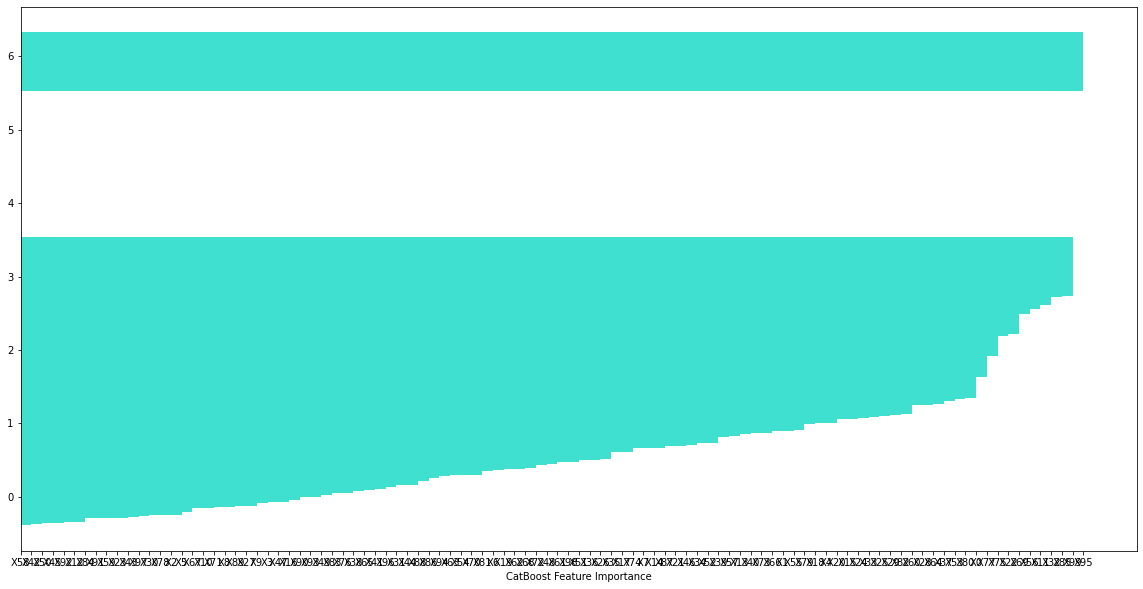

In [137]:
sorted_feature_importance = model_feature_importance[model_feature_importance.argsort()]
print(sorted_feature_importance)
plt.figure(figsize=(20,10))
plt.barh(sorted_feature_importance.values,
        sorted_feature_importance.index,
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [138]:
sorted_feature_importance.values

array([0.        , 0.01393051, 0.02433153, 0.03897446, 0.04411855,
       0.05012435, 0.05238014, 0.10473906, 0.10513082, 0.10948628,
       0.11390886, 0.1173701 , 0.13266399, 0.14525346, 0.14738308,
       0.15629836, 0.19689034, 0.23988576, 0.24737549, 0.25821243,
       0.26004306, 0.27043371, 0.27452146, 0.30897169, 0.32257569,
       0.33414467, 0.34984794, 0.3949452 , 0.40090202, 0.42611605,
       0.4448205 , 0.44930911, 0.47243531, 0.49306412, 0.50237113,
       0.52920444, 0.56122496, 0.56463946, 0.61929905, 0.65274196,
       0.68244155, 0.6897285 , 0.69934751, 0.70128636, 0.75589114,
       0.76662974, 0.78219323, 0.78412691, 0.79567746, 0.8334878 ,
       0.84558687, 0.87375761, 0.87436714, 0.90072118, 0.90681385,
       0.91836621, 1.00935934, 1.01335568, 1.0593413 , 1.06126797,
       1.06752102, 1.08739735, 1.08974018, 1.10626285, 1.12721304,
       1.13682351, 1.21278739, 1.22772989, 1.253958  , 1.26451706,
       1.27230404, 1.2896714 , 1.2908559 , 1.31317775, 1.39512

In [139]:
len(sorted_feature_importance)

100

In [140]:
y_df_eco_test

['microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:vibrio',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:disc ',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccobacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_e

In [141]:
#confusion_matrix = get_confusion_matrix(cb_model, Pool(X_train, y_train))
confusion_matrix_test = get_confusion_matrix(cb_model, Pool(X_df_eco_test, y_df_eco_test))
print(confusion_matrix_test.shape)
print(len(cb_model.classes_))
confusion_matrix_test_pd = pd.DataFrame(data=np.log(confusion_matrix_test+0.001), columns=cb_model.classes_, index=cb_model.classes_)

(13, 13)
13


In [142]:
precision_recall_fscore_support(y_df_eco_test, predictions, average=None)

(array([0.98791541, 0.93269231, 0.95332757, 1.        , 0.98947368,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([0.97695262, 0.94174757, 0.98219056, 0.75      , 0.97916667,
        1.        , 1.        , 0.5       , 1.        , 0.97452229,
        0.5       , 1.        , 0.99019608]),
 array([0.98240343, 0.93719807, 0.96754386, 0.85714286, 0.98429319,
        1.        , 1.        , 0.66666667, 1.        , 0.98709677,
        0.66666667, 1.        , 0.99507389]),
 array([2343,  103, 1123,    4,   96,    1,    3,    2,   11,  157,    2,
           1,  102]))

In [143]:
precision_recall_fscore_support(y_df_eco_test, predictions, average=None)

(array([0.98791541, 0.93269231, 0.95332757, 1.        , 0.98947368,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([0.97695262, 0.94174757, 0.98219056, 0.75      , 0.97916667,
        1.        , 1.        , 0.5       , 1.        , 0.97452229,
        0.5       , 1.        , 0.99019608]),
 array([0.98240343, 0.93719807, 0.96754386, 0.85714286, 0.98429319,
        1.        , 1.        , 0.66666667, 1.        , 0.98709677,
        0.66666667, 1.        , 0.99507389]),
 array([2343,  103, 1123,    4,   96,    1,    3,    2,   11,  157,    2,
           1,  102]))

In [144]:
precision_recall_fscore_support(y_df_eco_test, predictions, average='micro')

(0.9772036474164134, 0.9772036474164134, 0.9772036474164134, None)

In [145]:
precision_recall_fscore_support(y_df_eco_test, predictions, average='weighted')

(0.9775403861591627, 0.9772036474164134, 0.977181741432026, None)

In [146]:
precision_recall_fscore_support(y_df_eco_test, predictions, average=None, labels=cb_model.classes_)

(array([0.98791541, 0.95332757, 1.        , 1.        , 0.93269231,
        0.98947368, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([0.97695262, 0.98219056, 0.97452229, 0.99019608, 0.94174757,
        0.97916667, 1.        , 0.75      , 1.        , 1.        ,
        1.        , 0.5       , 0.5       ]),
 array([0.98240343, 0.96754386, 0.98709677, 0.99507389, 0.93719807,
        0.98429319, 1.        , 0.85714286, 1.        , 1.        ,
        1.        , 0.66666667, 0.66666667]),
 array([2343, 1123,  157,  102,  103,   96,   11,    4,    3,    1,    1,
           2,    2]))

In [147]:
print(classification_report(y_df_eco_test, predictions, target_names=cb_model.classes_))

                                           precision    recall  f1-score   support

     microtraits.cell_shape_enum:bacillus       0.99      0.98      0.98      2343
       microtraits.cell_shape_enum:coccus       0.93      0.94      0.94       103
       microtraits.cell_shape_enum:spiral       0.95      0.98      0.97      1123
       microtraits.cell_shape_enum:vibrio       1.00      0.75      0.86         4
microtraits.cell_shape_enum:coccobacillus       0.99      0.98      0.98        96
     microtraits.cell_shape_enum:filament       1.00      1.00      1.00         1
  microtraits.cell_shape_enum:pleomorphic       1.00      1.00      1.00         3
        microtraits.cell_shape_enum:disc        1.00      0.50      0.67         2
     microtraits.cell_shape_enum:fusiform       1.00      1.00      1.00        11
        microtraits.cell_shape_enum:flask       1.00      0.97      0.99       157
         microtraits.cell_shape_enum:star       1.00      0.50      0.67         2
   

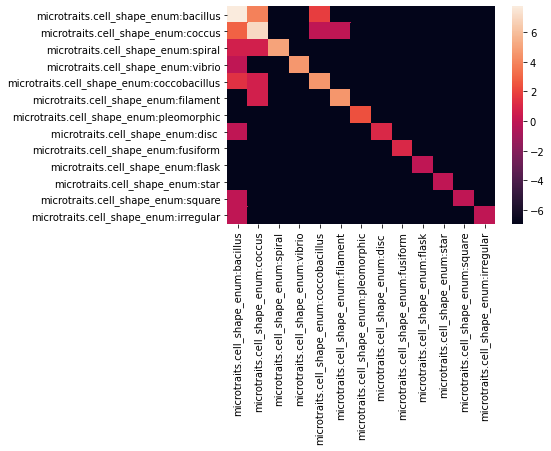

In [148]:
ax = sns.heatmap(confusion_matrix_test_pd)


In [149]:
shap_values = explainer_model.shap_values(X_df_eco_test)

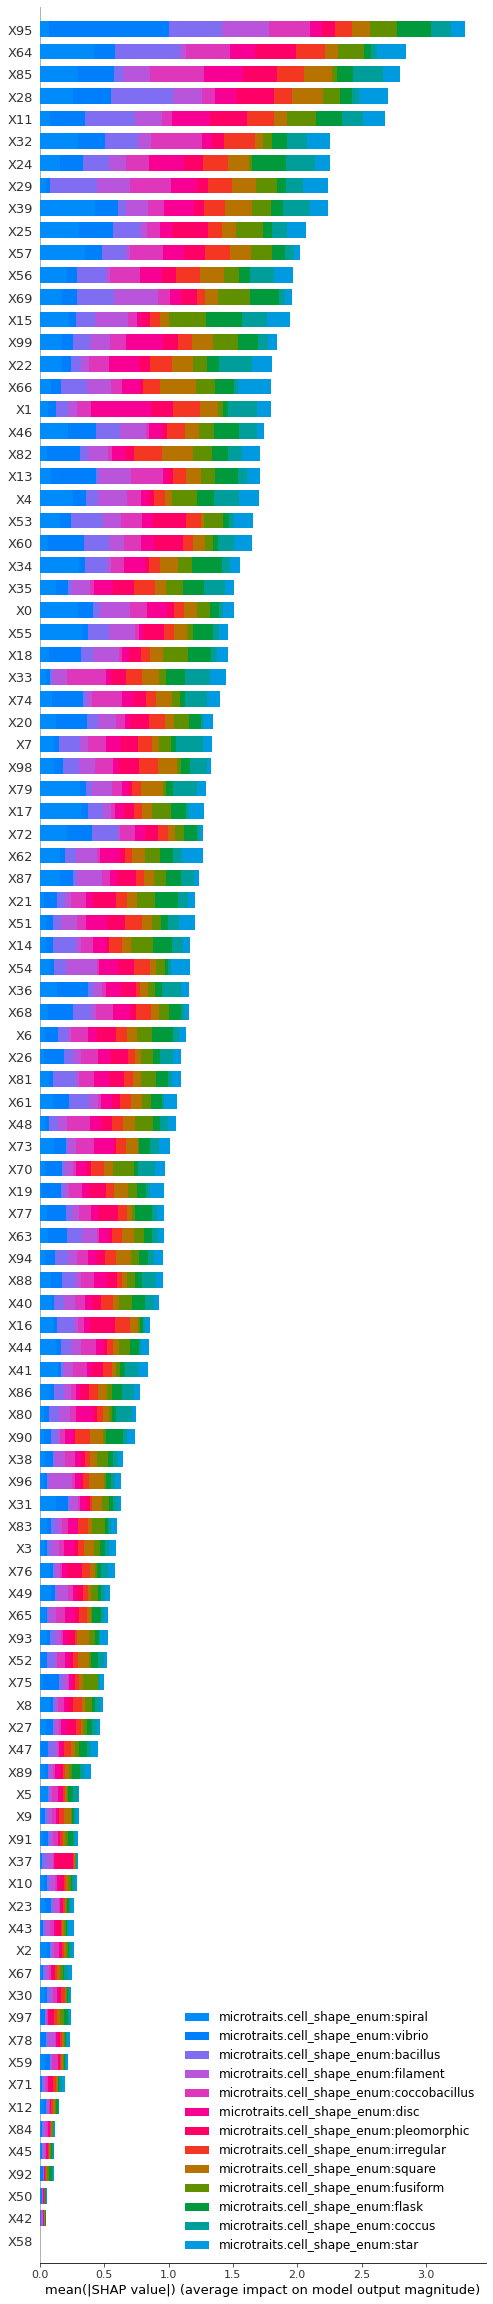

In [151]:
shap.summary_plot(shap_values, X_df_eco_test, feature_names = cb_model.feature_names_,class_names=cb_model.classes_,max_display=X_df_eco_test.shape[1])